deep decision trees have low bias, but suffer from **high variance**

remedy methods:

1. tree pruning

2. ensemble

# idea of ensemble

- a tree = 1 person

- a forest = many trees = crowd

- ensemble methods: listen to **"Wisdom of the crowds"**  - grow many trees then **averaging** to smooth the tree, **remain low bias while decreasing variance**, manage bias-variance tradeoff with **randomization**

- bagging and random forest: listen to **"Wisdom of the clever crowds"** - grow many **deep** trees

- boosting: listen to "Wisdom of **stupid** crowds" (learn from your mistakes) - grow many **shallow** trees

# types of ensemble

- parallel ensembles: each model is built **independently** (want everyone in crowd think different), combine multiple high complexity (low bias) models to reduce variance

    - bagging (**b**ootstrap **agg**regating)

    - random forest

- sequential ensembles: models are built sequentially based on previous model's performance, modify where previous low complexity models lack

    - boosting

# bagging (**b**ootstrap **agg**regating)

bootstrap: 靴带

the name come from the idom "pull oneself up by onw's own bootstrap" 用自己的靴带把自己拉起来

## independent vs. dependent samples

### independent samples

Given $Y_1, Y_2, ..., Y_n$ iid with mean $\mu$ and variance $\sigma^2$

iid (identically independently distributed)

suppose we want to estimate $\mu$

we have 2 estimators $Y_1$ and $\bar Y$, which one is better?

calculate expectation and variance of these 2 estimators

- both are unbiased estimate

  $\mathbb{E}(Y_1)=\mathbb{E}(\bar Y)=\mu$ 

- Variance of $\bar Y$ is smaller

  $Var(Y_1)=\sigma^2, Var(\bar Y)=\frac{1}{n}\sigma^2$
  
- Thus, estimator $\bar Y$ is better

### dependent samples

Given $Y_1, Y_2, ..., Y_B$ only identically distributed with mean $\mu$ and variance $\sigma^2$, **but not independent (with correlation $\rho$)**

suppose we want to estimate $\mu$

we have 2 estimators $Y_1$ and $\bar Y$, which one is better?

calculate expectation and variance of these 2 estimators

- both are unbiased estimate

  $\mathbb{E}(Y_1)=\mathbb{E}(\bar Y)=\mu$ 

    
- $Var(Y_1)=\sigma^2$

  $Var(\bar Y)=\frac{1-\rho}{B}\sigma^2+\rho \sigma^2=\left(\frac{1-\rho}{B}+\rho\right)\sigma^2$
  
  in extreme case $\rho = 1$ (data are highly correlated), then $Var(\bar Y)=\sigma^2$

  this means listening to one person is equal to listening to everyone

## Algorithm

- if we have multiple independent training sets, we can grow multiple trees, then take an average

- but in practice, we only have **1 training set**, so use bagging

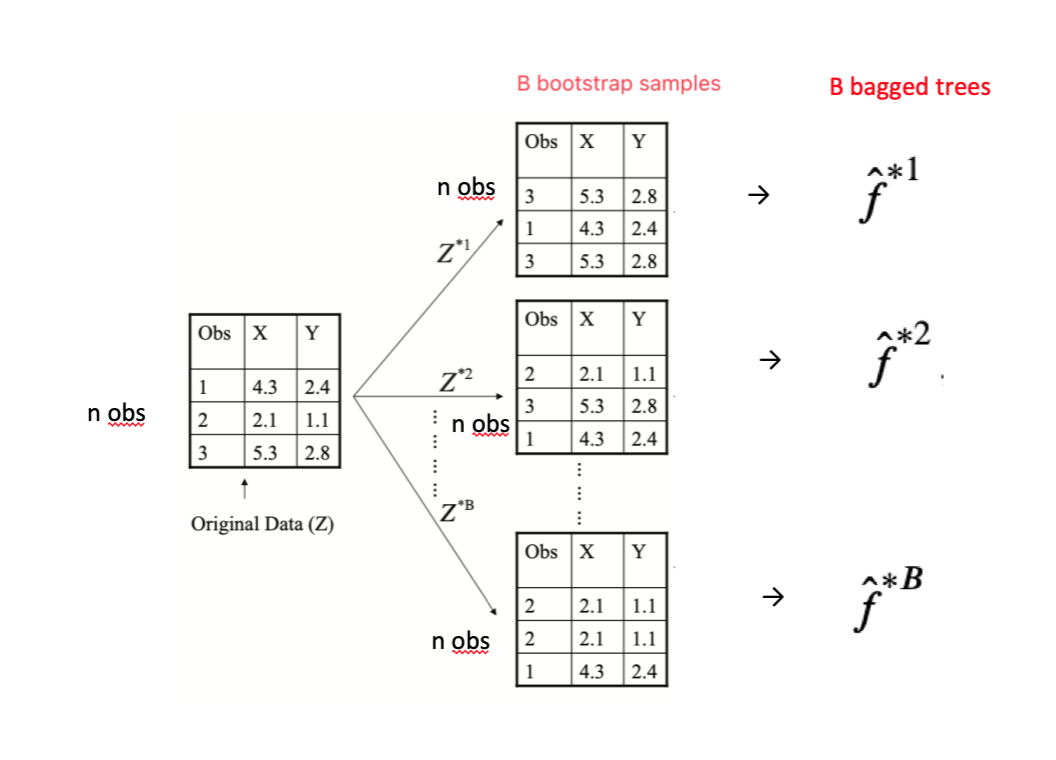

- original training set $Z$ has $n$ observations.

- for $b=1,.., B$, randomly uniformly sample $n$ observs from $Z$ **with replacement** (observ can repeat) to obtain $B$ bootstrap samples, called $Z^{*1}, Z^{*2},...,Z^{*B}$

- for each bootstrap sample $Z^{*b}$, parallelly grow a tree without pruning: $\hat f^{*b}$

  grow $B$ trees in total: $\hat f^{*1}, \hat f^{*2},...,\hat f^{*B}$


- for prediction at data point $x$, take an average/majority vote to be the predicted value

$$
\text{regression }\hat f(x)=\frac{1}{B}\sum_{b=1}^B \hat f^{*b}(x)\\[1em]
\text{classification}\hat f(x)= \underset{k}{\arg\max}\frac{\mathbb{1}(\hat f^{*b}(x)=k)}{B}
$$

## out-of-bag (OOB) error estimation

- because we sample with repeat, **each bagged tree only use $\frac{2}{3}$ of all observs**

    we can make use of the unused $\frac{1}{3}$ data of each bagged tree (**out-of-bag observ**) to surrogate **test error**


- probability of all observs are picked in a bag = $\frac{2}{3}$

$$
\lim_{n \to \infty}1-\left(1-\frac{1}{n}\right)^n = 1-\frac{1}{e} \approx \frac{2}{3}
$$


- probability of an observ is picked in n observ: $\frac{1}{n}$


- probability of an observ is **NOT** picked in n observ: $1-\frac{1}{n}$


- probability of an observ is **NOT** picked in n observ in **n independent trails** (n bags, note, we use B before): $\left(1-\frac{1}{n}\right)^n$


- probability of an observ **is** picked in n observ in **n independent trails**: $1-\left(1-\frac{1}{n}\right)^n$ ,i.e.probability of all observs are picked in a bag

### OOB error is a good surrogate for test error

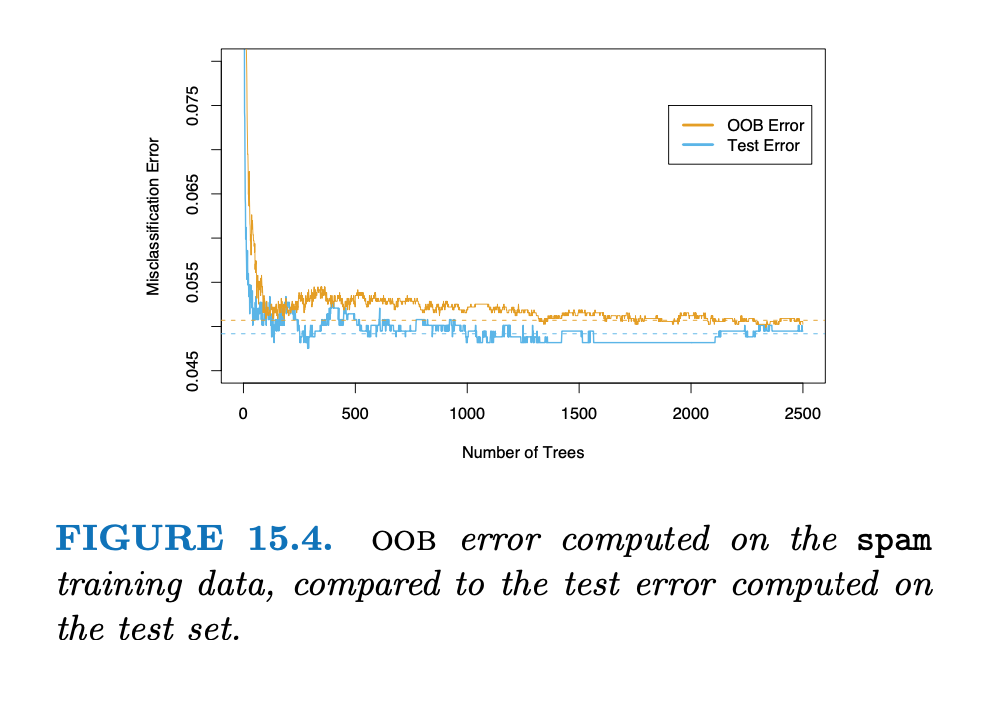

- for each bagged tree, predict $Y_i$ at an OOB observ $X_i$ to be $\hat Y_{\text{bag b},i}$

- take average over all predictions for ith observ to get a OOB prediction $\hat Y_i$

- compute test error of $n$ OOB prediction $\hat Y_1, \hat Y_2,...,\hat Y_n$, that is OOB error

$$
\text{OOB Error} = \frac{1}{n} \sum_{i=1}^n (\hat Y_i - Y_i)^2
$$

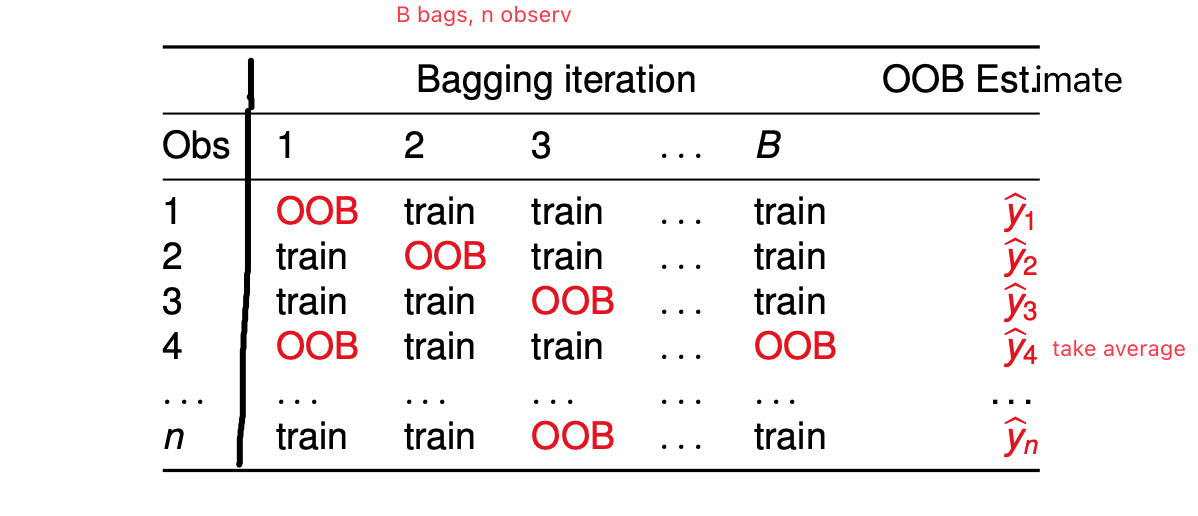

## variance importance (feature importance)

- bagging is hart to interpretate bc each tree is different

- **variance importance** is a good tool for interpreting an ensemble model

    it is measured by the **amount that RSS (for regression) or Gini index (for classification) is reduced** due to splits over a given predictor $X_k$, then averaged over all $B$ trees


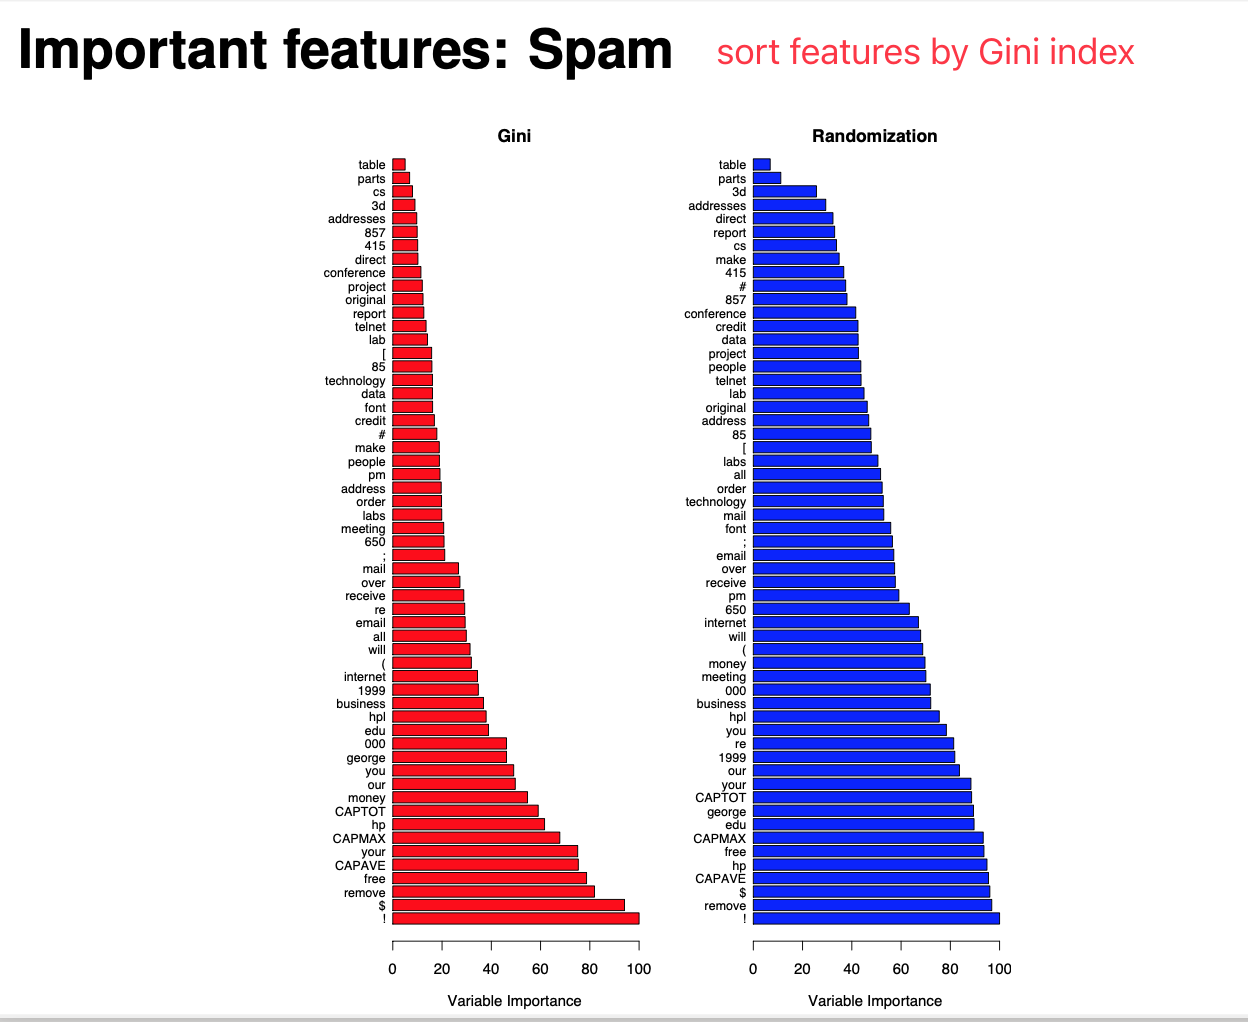